# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

Для первого знакомства с данными из файла необходимо сделать:
1. Импортировать библиотеку pandas
2. Прочитать файл, сохранив его в переменной data
3. Вывести на экран первые 20 строк файла
4. Вывести информацию из файла
5. Построить гистрограмму для всех численных значений из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [3]:
print(data.head(10))

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0        51.00      8          NaN  ...   
1             NaN          11.0        18.60      1          NaN  ...   

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

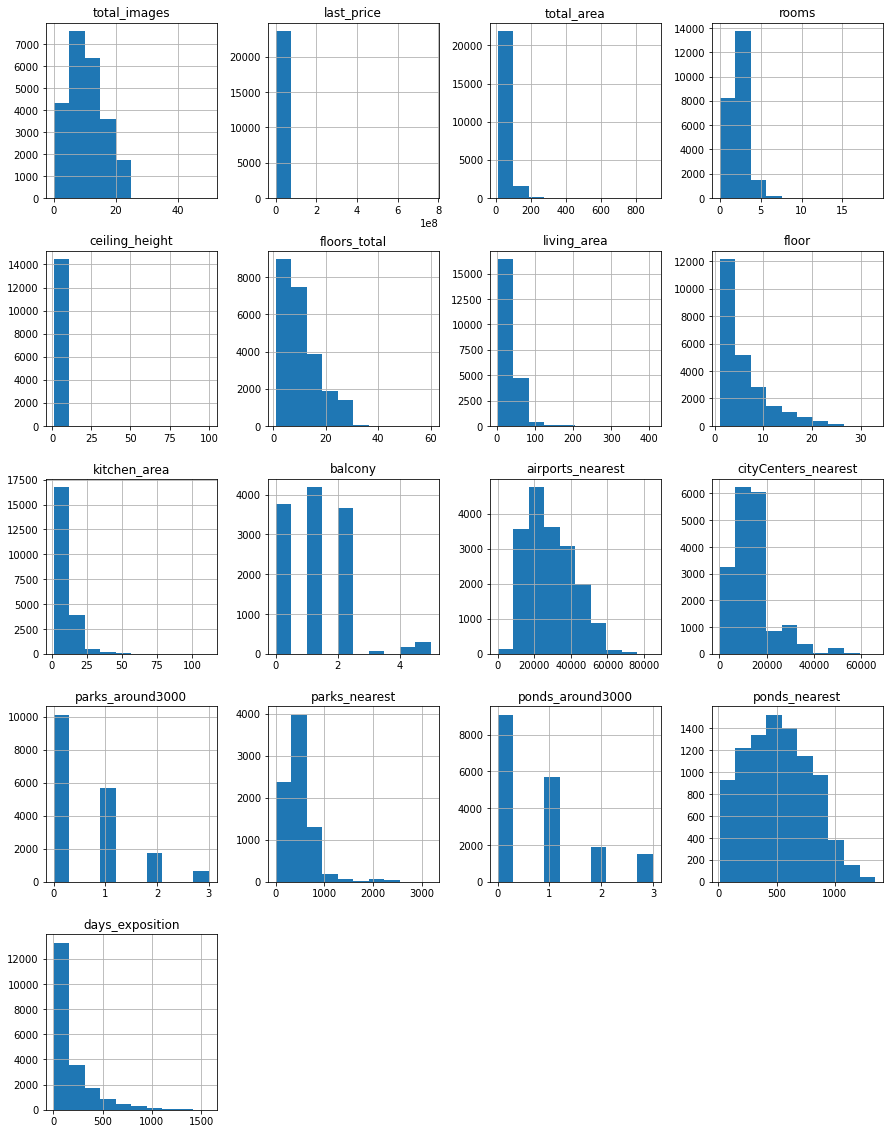

In [5]:
data.hist(figsize=(15, 20));

Вывод:из полученного файла видно, что:
1. часть данных, практически во всех колоннах, представленна в виде NaN. Необходимо разобраться с ними, возможно ли их заменить;
2. есть неккоректные типы данных, например, тип object присвоенный значениям first_day_exposition;
3. возможно в данных  locality_name есть дубликапы;
4. по постренным гистограммам видно, что есть значения, которые сильно выбиваются из распределелия, что затрудняет дальнейший анализ даных.

### Выполните предобработку данных

Первое, что необходимо сделать при предобработке данных, определим сколько пропусков есть в каждой категории.

In [6]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Из полученных данных опропусках и при первичном знакомстве с данными, изменить информацию без потерь возможно в следующих столбцах:
1. balcony - пропуск вданном столбце - отсутсвие балкона, поэтому заменим NaN на 0 и поменяет тип данных на int;

2. parks_around3000 - пропуск - отсутствие парка, поэтому заменим NaN на 0 и поменяет тип данных на int;

3. ponds_around3000 - пропуск - отсутствие водоема, поэтому заменим NaN на 0 и поменяет тип данных на int;

4. ponds_nearest - пропуск связан с ponds_around3000(если ponds_around3000 = 0, то значение NaN), поэтому заменим NaN на 0 и поменяет тип данных на int; 

5. is_apartment - прокуск связан с тем, что данное значение False, поскольку заполненные значение True, меняет значения и тип данных на int;

6. locality_name - ищем дубликапы и изменяем их, удаляем строки с значением NaN (их 48, на анализ сильно не повлияет);

7. first_day_exposition - данные представлены в типе object, меняем на тип datetime;

8. open_plan - меняем тип bool на тип int;

9. days_exposition - поскольку пропусков много, в пустые значения добавить мединное значение по дате подачи(в дате смотреть уникальные значения по году и месясцу(полностью дату рассматривать нельзя, потому что есть тогда уникальные значения дат, в которых days_exposition все NaN(это не позволит в пропуски поставить медиану по данной уникальной дате)
.

После преодобработки данныз еще раз определить количество пропусков для каждой категории, вызвать информацию для обработанных данных и построить гистрограммы для них

In [7]:
data['balcony'] = data['balcony'].fillna(0).astype(int) #пунтк 1

In [8]:
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int) #пункт 2

In [9]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int) #пункт 3

In [10]:
#data['ponds_nearest'] = data['ponds_nearest'].fillna(0) #пункт 4

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False).astype(int) #пункт 5

In [12]:
print (data['locality_name'].unique()) #пункт 6

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [13]:
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['городской поселок', 'поселок при железнодорожной станции', 'поселок городского типа', 'коттеджный поселок', 'поселок станции'], 'поселок', regex=True)
    .replace(['садоводческое некоммерческое товарищество'], 'садовое товарищество', regex=True)
    #.fillna('Неизвестно')
) 

In [14]:
data = data.dropna(subset = ['locality_name'])
data = data.reset_index(drop = True)

In [15]:
print(data.shape[0])#проверка строк, первоначально:23698

23650


In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format = '%Y%m%d %H:%M:%S')  #пункт 7

In [17]:
data['days_exposition'].describe() #пункт 9

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

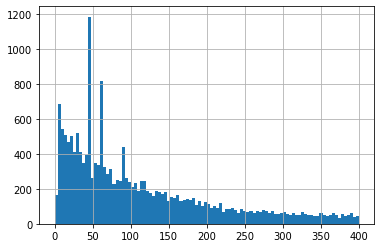

In [18]:
data['days_exposition'].hist(range = (0,400), bins = 100)

In [20]:
dd = data['first_day_exposition'].dt.strftime('%Y:%m').unique()

In [21]:
for d in dd :
   data.loc[(data['first_day_exposition'].dt.strftime('%Y:%m') == d) & (data['days_exposition'].isna()), 'days_exposition'] = data.loc[(data['first_day_exposition'].dt.strftime('%Y:%m') == d), 'days_exposition'].median()

count    23650.000000
mean       165.198943
std        213.129494
min          1.000000
25%         39.000000
50%         80.000000
75%        203.000000
max       1580.000000
Name: days_exposition, dtype: float64

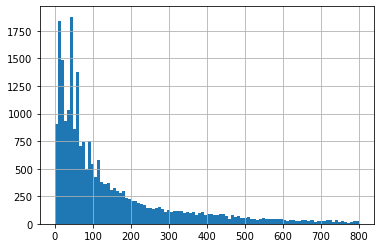

In [22]:
data['days_exposition'].hist(range = (0,800), bins = 100)
data['days_exposition'].describe() #пункт 9


In [23]:
data['open_plan'] = data['open_plan'].astype(int) #пункт 8
data['days_exposition'] = data['days_exposition'].astype(int) #пункт 9

In [24]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition             0
dtype: int64


In [25]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23650 entries, 0 to 23649
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        14490 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21752 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  int64         
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  int64         
 12  kitchen_area          21381 non-null  float64       
 13  balcony         

In [26]:
#data.hist(figsize=(15, 20))

Вывод: после преодобработки данных видно, что большинство данных, в которых были внесены исправления, на гистограммах принимают вид распределения Пуассона, что свидетествует о корректном изменении их. Для даных days_exposition наблюдаются анамальные значения, это связано с тем, что пропуски заполнялись по медиане значений  days_exposition для каждого уникального значения даты начала объявлений (год и месяц).Другие сортировки привели бы к потери данных в размере 3181 строк и/или большим пикам в нуле и других значениям.
    

### Добавьте в таблицу новые столбцы

Добавление новых столбцов для анализа данных:
1. cost_metr - определение цены одного квадратного метра, используя метод round;
2. date_pub - определение дня(недели) публикации объявления методом weekday;
3. month_pub - определение месяца, в котором было дано объявление, с помощью month;
4. year_pub - определение года, в котором было дано объявление, с помощью year;
5. type_flat - поскольку в данных есть пропуски, необходимо создать данные в которых будет указание, к какой категории относятся данные: первый(этаж), последний(этаж), другой(этаж); использовать where;
6. centers_nearest - изменение расстояния на км и округление с помощью round округлить до целого числа.

После добавления вывести на экран новую таблицу.

In [27]:
data['cost_metr'] = round(data['last_price'] / data['living_area'], 2) #пункт 1

In [28]:
data['date_pub'] = data['first_day_exposition'].dt.weekday #пункт 2

In [29]:
data['month_pub'] = pd.DatetimeIndex(data['first_day_exposition']).month #пункт 3

In [30]:
data['year_pub'] = pd.DatetimeIndex(data['first_day_exposition']).year #пункт 4

In [31]:
data['type_flat'] = (
    data['floor']
    .where(data['floor'] != 1, 'первый')
    .where(data['floors_total'] != data['floor'], 'последний')
   .where((data['floor'] == 1) | (data['floors_total'] == data['floor']), 'другой')
) #пункт 5

In [32]:
data['centers_nearest'] = round(data['cityCenters_nearest'] / 1000) #пункт 6

Вывод: покольку много данных даже после предобработки остались неопределены, их удаление повлияет на анализ, поэтому один из выходов создание новых колонн по имеющейся информации.

### Проведите исследовательский анализ данных

#### Исследование параметра "общая площадь":
1. Построить гистограмму и посмотреть распределение значений
2. Посмотреть возможен ли срез и/или дополнения данных

In [33]:
data['total_area'] = data['total_area'].astype(int)

In [34]:
data = data.query('(total_area < 300)')

count    23587.000000
mean        59.180778
std         30.469886
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        297.000000
Name: total_area, dtype: float64

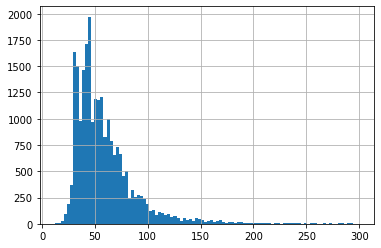

In [35]:
data['total_area'].hist(range = (12,300), bins = 100)
data['total_area'].describe()

Вывод: 
1. был проведен сред данных по максимальному значению 300 м^2(было убрано 63 строки);
2. по полученым данным минимальная общая площадь жилья составляет 12 м^2, среднее значение равно 59 м^2
3. присутствуют анамальные скачки значения от 30 до 50  м^2

#### Исследование параметра "жилая площадь":
1. Построить гистограмму и посмотреть распределение значений
2. Достроить недостающие Значения из тех соображений, что для однокомнатной/студии - минимальная площадь 14 м^2, для квартир с большим кол-вом комнат - 16 м^2.
3. Построить гистограмму разности площадей общей и жилой.
4. Построить гистограмму, где две площади: жилая и общая.

In [36]:
data['living_area'] = (
    data['living_area']
   .where(data['rooms'] <= 1,data['living_area'].fillna(16))
   .where(data['rooms'] > 1, data['living_area'].fillna(14))
)

count    23587.000000
mean        32.516875
std         19.686101
min          2.000000
25%         17.800000
50%         29.000000
75%         41.000000
max        250.000000
Name: living_area, dtype: float64

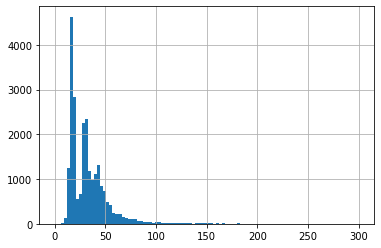

In [37]:
data['living_area'].hist(bins = 100, range = (0, 300))
data['living_area'].describe()

<AxesSubplot:>

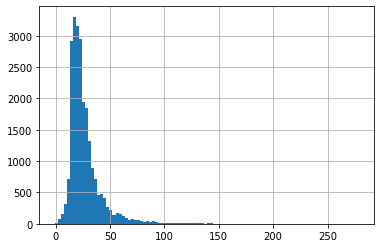

In [38]:
(data['total_area'] - data['living_area'] ).hist(bins = 100)

In [39]:
import numpy as np

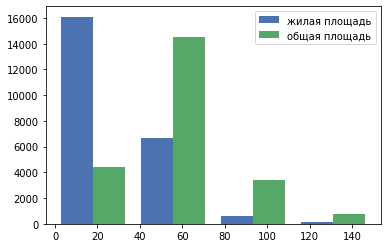

In [40]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-deep')

x = data['living_area']
y = data['total_area']
bins = np.linspace(-1, 150, 5)

plt.hist([x, y],bins, label=['жилая площадь', 'общая площадь'])
plt.legend(loc='upper right')
plt.show()

Вывод:
1. Была проведена замена недостоющих значений на 14 и 16 м^2 (минимальные площади для квартир согласно СанПину)
2. Исходя из построенных гистограмм следует, что:
    - средняя жилая площадь составляет 39 м^2
    - минимальное значение жилой площади составляет 2 м^2, что не соответствует реальным размерам согласно СанПину, данные значения являются некорректными
    - при значениях < 40 жилая площадь больше общей, что является аномалией

#### Исследование параметра "количество комнат":
1. Построить гистограмму и посмотреть распределение значений
2. Посмотреть корреляцию с такими параметрами, как: общая площадь, аппартаменты, студия, открытая планировка

In [41]:
data['rooms'] = data['rooms'].astype(int)

count    23587.000000
mean         2.058252
std          1.045111
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

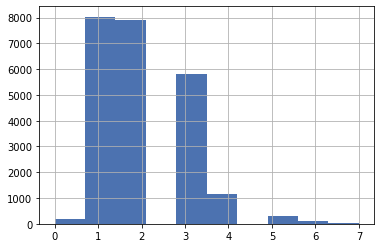

In [42]:
data['rooms'].hist(bins = 10, range = (0,7))
data['rooms'].describe()

In [43]:
print(data['rooms'].corr(data['total_area']))
print(data['rooms'].corr(data['studio']))
print(data['rooms'].corr(data['open_plan']))
print(data['rooms'].corr(data['is_apartment'])) 

0.7855207597662286
-0.15139616104091633
-0.08896579299282235
-0.0016521908633902425


Вывод:
1. Минимальное число комнат  - 0 (196 значений), это связано с общей площадью (есть значения меньше 14 м^2 - минимального порога, поэтому и конат 0)
2. Максимальное число комнат - 16, также связано с общей площадью(но тоже может относитлься к анамальным значениям).
3. Мредний показатель количества комнат в квартире - 2.
4. Количество комнат зависит линейно от общей площади квартиры. От таких параметров, как студия, открытая планировка, аппартаметны, линейной зависимости не показало.

#### Исследование параметра "площадь кухни":
1. Добавление значений пропущенных в виде разницы площадей общей и жилой, но если разница отрицательная присваеваем минимальное значение 5(данные взяты из Интернета(мин. площадь кухни))
2. Строим гистограммы и распределение

In [44]:
#print(data[{'kitchen_area','rooms', 'total_area', 'living_area', 'studio'}].sort_values(by = 'rooms').head(10))

In [45]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] - data['living_area'])
data['kitchen_area']  = (
    data['kitchen_area']
   .where(data['kitchen_area'] >= 0,5)
)

count    23587.000000
mean        12.785471
std         12.639752
min          0.000000
25%          7.200000
50%          9.800000
75%         13.000000
max        279.000000
Name: kitchen_area, dtype: float64

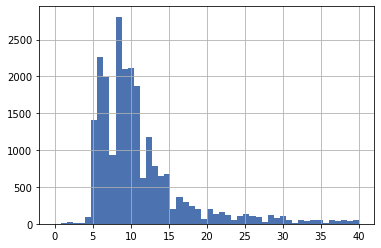

In [46]:
data['kitchen_area'].hist(bins = 50, range = (0, 40))
data['kitchen_area'].describe()

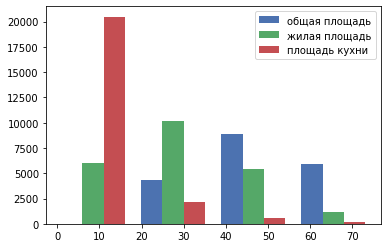

In [47]:
plt.style.use('seaborn-deep')

x = data['total_area']
y = data['living_area']
z = data['kitchen_area']

bins = np.linspace(-1, 75, 5)

plt.hist([x, y, z],bins, label=['общая площадь', 'жилая площадь', 'площадь кухни'])
plt.legend(loc='upper right')
plt.show()

Вывод:
1. минимальная площадь кухни составила 0 м^2, что не соответсвует действительности
2. при малых значения площади наблюдается сильное превышение площади кухни, что связано с большим отсуствием данных по данному параметру и необходимости дополнять его значениями.

#### Исследование параметра "стоимость квартиры":
1. Все данные разделить на 1000 руб, для простоты восприятния информации
2. Построить гистограмму и распределение стоимсти квартир

In [48]:
data['last_price'] = (data['last_price'] / 1000).astype(int)

count     23587.000000
mean       6300.778183
std        7760.646399
min          12.000000
25%        3400.000000
50%        4600.000000
75%        6750.000000
max      330000.000000
Name: last_price, dtype: float64

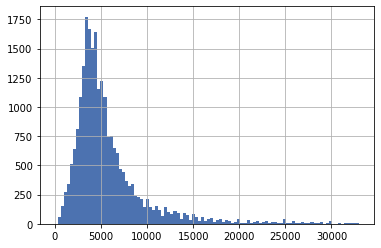

In [49]:
data['last_price'].hist(bins = 100, range = (0, 33000))
data['last_price'].describe()

Вывод:
1. Средняя стоимость квартиры составило 6 300 000 руб.
2. Минимальное значение стоимости квартиры: 12 000 руб.
3. Максимальная стоимость квартиры: 330 000 000 руб.
4. Из полученных данных выдно, что есть очень низкая стоимость и очень высокая, с чем это связано непонятно, необходимо провести исследование на влияние цены других параметров.

#### Исследование параметра "высота потолков":
1. Провести доработку данных, исправить те, которые привышают 10 м, пропуски заполнить медианой
2. Построить гистограмму и распределение
3. Сделать корреляцию с параметрами "студия", "свободная планировка", "аппартаменты"


In [50]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 10.0, data['ceiling_height'] / 10.0 )
data['ceiling_height'] =data['ceiling_height'].fillna(data['ceiling_height'].median()) 

count    23587.000000
mean         2.696365
std          0.234091
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

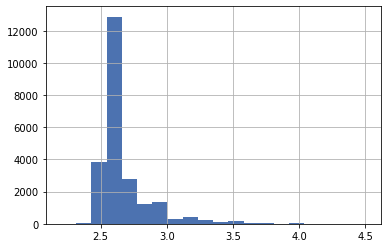

In [51]:
data['ceiling_height'].hist(bins = 20, range = (2.2,4.5))
data['ceiling_height'].describe()

In [52]:
print(data['ceiling_height'].corr(data['studio']))
print(data['ceiling_height'].corr(data['open_plan']))
print(data['ceiling_height'].corr(data['is_apartment'])) 

0.010679054897292402
-0.004491937492636977
0.08448062087106376


Вывод:
1. Среднее значение потолков равно 2.6 м, что соотвествует норме
2. Максимальное значение потолков: 8.3 м
3. Минимальное значение потолков: 1 м
4. Максимальные и минимальные значения являются анамалиями, но как видно из гистограммы их небольшое количество, основное значение лежит в диапазоне от 2.2 до 3.5
5. Высота потолков не зависят линейно от того является ли квартира студией, апартаментами или у нее свободная планировка

#### Исследование параметра "количество этажей":
1. Заменить попуски значений на среднее число этажей
2. Посмотреть связь количество этажей от параметров "студия" и "апартаменты"
3. Построить гистограмму и распределение

In [53]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].mean())
print(data['floors_total'].corr(data['studio']))
print(data['floors_total'].corr(data['is_apartment'])) 

0.06946191846881403
-0.026255664750750664


count    23587.000000
mean        10.686963
std          6.584525
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

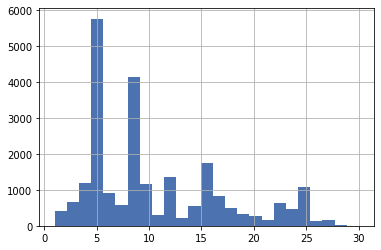

In [54]:
data['floors_total'].hist(bins = 25, range = (1,30))
data['floors_total'].describe()

Вывод:
1. Было обнаружено 85 этажей без значений, эти этажи были заменены на среднее значение
2. По гистаграмме видно, что среднее количество этажей - 10, минимальное количество этажей - 1, максимальное - 60. Максимальное и минимальное значения - это отклонения, скорее всего связанные и ошибками при вводе данных в таблицу
3. Количество этажей не зависит линейно от того является квартира студией или это аппартаметы

#### Исследование параметра "количество этажей":

<AxesSubplot:>

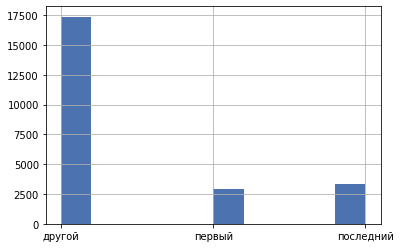

In [55]:
data['type_flat'].hist()

Вывод:
1. Предпочтительнее всего берут этажы между первым и последним.
2. Первый этаж берут хуже, чем последний

#### Исследование параметра "расстояние до центра города в метрах":
1. Заменить пропуски медианным значением
2. Построить гистрограмму и распределение

In [56]:
data['cityCenters_nearest'] =data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median()) 

count    23587.000000
mean     13961.506805
std       7546.792484
min        181.000000
25%      10971.000000
50%      13118.000000
75%      15254.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

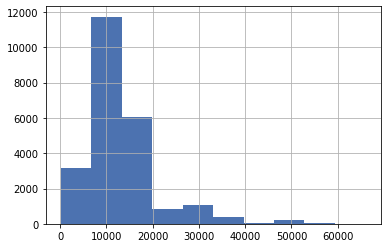

In [57]:
data['cityCenters_nearest'].hist()
data['cityCenters_nearest'].describe()

Вывод:
1. Среднее значение расстояния до центра составляет 13 961 м
2. Минимальное расстояние: 181 м
3. Максимальное расстояние: 65 968 м

#### Исследование параметра "расстояние до ближайшего парка":
1. Заменить пропуски медианным значением
2. Построить гистрограмму и распределение

In [58]:
data['parks_nearest'] =data['parks_nearest'].fillna(data['parks_nearest'].median()) 

count    23587.000000
mean       466.922224
std        200.592718
min          1.000000
25%        454.500000
50%        454.500000
75%        454.500000
max       3190.000000
Name: parks_nearest, dtype: float64

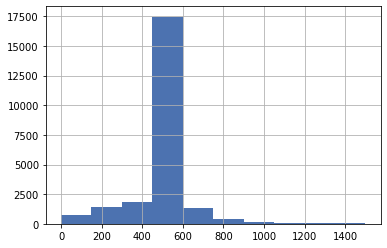

In [59]:
data['parks_nearest'].hist(range = (0, 1500))
data['parks_nearest'].describe()

Вывод:
1. Среднее расстояние от дома до парка составляет 466 метров
2. Максимальное расстояние от дома до парка составляет 3190 метров

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Ты корректно подбираешь основные диапазоны, а также верно читаешь графики! Диапазоны для аномальных значений подобраны и удалены тоже верно, хотя высоту потолков я бы ограничил 4-6 метрами)
</div>

#### Анализ быстроты продажи квартиры:
1. Построить гистограмму и распределение
2. Вычислить медиану

count    23587.000000
mean       164.996947
std        212.933391
min          1.000000
25%         39.000000
50%         80.000000
75%        203.000000
max       1580.000000
Name: days_exposition, dtype: float64

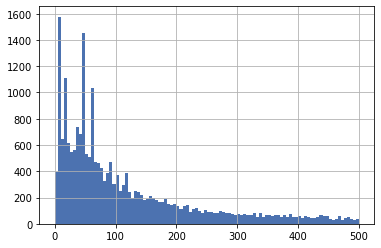

In [60]:
data['days_exposition'].hist(bins = 100, range = (0, 500))
data['days_exposition'].describe()

In [61]:
data['days_exposition'].median()

80.0

Вывод:
1. Среднее значение продажи составило 165 дней, медианное значение - 80 дней. Это связано с аномально большими и малыми значениями данного параметра (поэтому среднее и медианы различны)
2. По гистограмме аномально быстрая продажа: от 0 до 5 дней
3. По гистограмме аномально долгая продажа: от 400 до 1580 дней

#### Анализ влияния различных факторов на стоимость объекта
1. Построение матриц рассеивания и коэффициента корреляции для параметров даты, метража, этажей

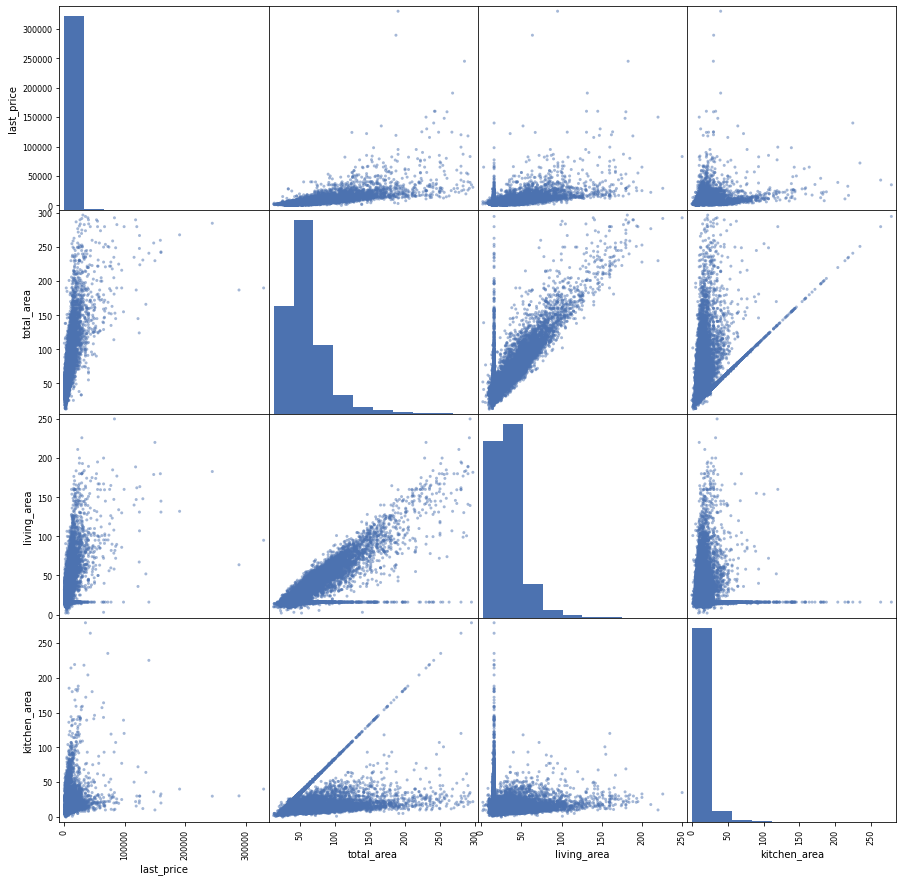

In [62]:
data_new = data.loc[:, ['last_price', 'total_area', 'living_area', 'kitchen_area']]
pd.plotting.scatter_matrix(data_new, figsize=(15, 15)); 

In [63]:
print(data_new.corr())

              last_price  total_area  living_area  kitchen_area
last_price      1.000000    0.675223     0.542570      0.331717
total_area      0.675223    1.000000     0.857990      0.416753
living_area     0.542570    0.857990     1.000000      0.027065
kitchen_area    0.331717    0.416753     0.027065      1.000000


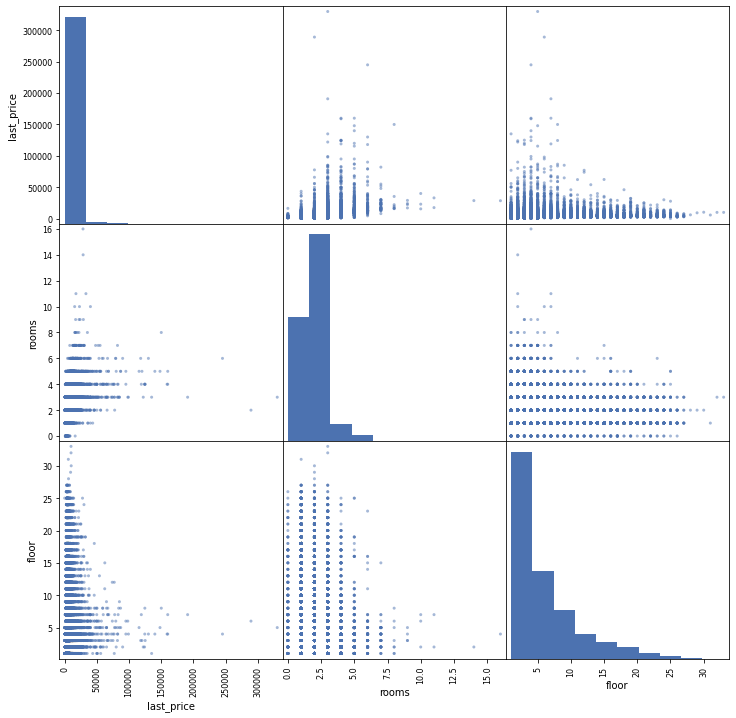

In [64]:
data_new2 = data.loc[:, ['last_price', 'rooms', 'floor']]
pd.plotting.scatter_matrix(data_new2, figsize=(12, 12)); 

In [65]:
print(data_new2.corr())

            last_price     rooms     floor
last_price    1.000000  0.393831  0.027068
rooms         0.393831  1.000000 -0.154307
floor         0.027068 -0.154307  1.000000


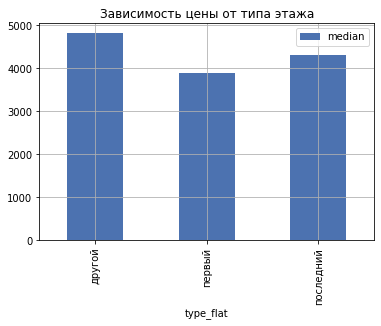

In [66]:
data_new3 = data.pivot_table(index = 'type_flat', values = 'last_price', aggfunc = 'median')
data_new3.columns = ['median']
data_new3.plot(kind = 'bar', grid = True, title = 'Зависимость цены от типа этажа')
plt.show()

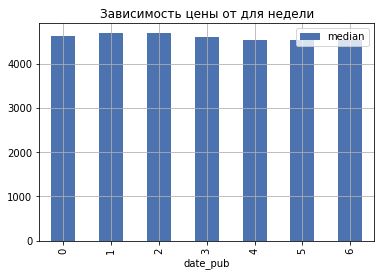

In [67]:
data_new4 = data.pivot_table(index = 'date_pub', values = 'last_price', aggfunc = 'median')
data_new4.columns = ['median']
data_new4.plot(kind = 'bar', grid = True, title = 'Зависимость цены от для недели')
plt.show()

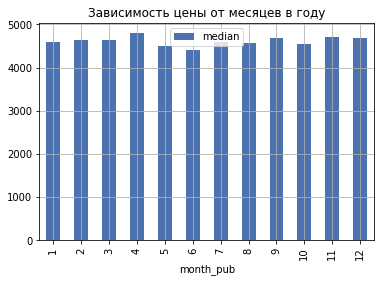

In [68]:
data_new5 = data.pivot_table(index = 'month_pub', values = 'last_price', aggfunc = 'median')
data_new5.columns = ['median']
data_new5.plot(kind = 'bar', grid = True, title = 'Зависимость цены от месяцев в году')
plt.show()

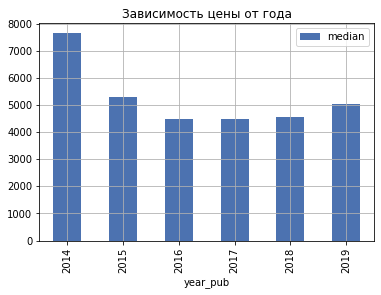

In [69]:
data_new6 = data.pivot_table(index = 'year_pub', values = 'last_price', aggfunc = 'median')
data_new6.columns = ['median']
data_new6.plot(kind = 'bar', grid = True, title = 'Зависимость цены от года')
plt.show()

Вывод:
1. Стоимость жилья зависит от метража, наблюдается линейная зависимость. Наиболее распространейнный диапазон цен до порядка 40 000 000 руб, также с увеличением метража на диаграммах наблюдаются асимптоты, то есть наблюдаются пороки с которых начинается старт продаж в зависимости от метража.
2. Стоимость от количества комнат в квартире зависит, но в среднем берут двухкомнатные, с увеличением комнат растет цена, что заставляет падать интерес к рассмотрению иных квартир из-за увеличения цены. Этаж в выборе квартир в основном рассматривается до 15. На стоимость квартиры оказывыет тип этажа. Первый этаж, по сравнию с остальными, имеет амую низкую стоимость. Самую высокую стоимость имеют этажы между первым и последним.
3. Месяц и день не оказывают сильное влияние на стоимость квартир. Но больше всего квартиры стоят в апреле, ниже всего в июне. Самая высокая стоимость в среду, низкая в пятницу. 
4. Год влияет на стоимость квартир. с 2014 по 2016 наблюдался спад цен, после 2017 идет увеличение цены.

#### Расчёт средней цены одного квадратного метра в 10-ти насёленных пунктах с наибольшим числом объявлений

In [70]:
data['cost_metr'] = round(data['last_price'] / data['living_area'], 2)

In [71]:
dn0 = data.loc[:, ['locality_name', 'cost_metr']]
dn = dn0.pivot_table(index = 'locality_name', values = 'cost_metr', aggfunc = ['median', 'count'])
dn.columns = ['median', 'count']
print(dn.sort_values(by = 'count',ascending = False).head(10))
print(dn.query('count == 1').index)
print(dn.query('count == 15662').index)

                    median  count
locality_name                    
Санкт-Петербург    195.205  15662
поселок Мурино     178.100    556
поселок Шушары     149.835    440
Всеволожск         126.400    398
Пушкин             187.060    367
Колпино            126.920    337
поселок Парголово  208.970    327
Гатчина            118.690    307
деревня Кудрово    195.930    299
Выборг             100.000    237
Index(['деревня Большая Пустомержа', 'деревня Большое Рейзино',
       'деревня Большой Сабск', 'деревня Борисова Грива',
       'деревня Вахнова Кара', 'деревня Зимитицы', 'деревня Иссад',
       'деревня Каськово', 'деревня Кисельня', 'деревня Котлы',
       'деревня Кривко', 'деревня Курковицы', 'деревня Куровицы',
       'деревня Лаврики', 'деревня Лупполово', 'деревня Малая Романовка',
       'деревня Мануйлово', 'деревня Меньково', 'деревня Нижние Осельки',
       'деревня Нижняя', 'деревня Новолисино', 'деревня Пельгора',
       'деревня Пижма', 'деревня Пикколово', 'деревня Пус

Вывод: 
1. Наибольшее число объявлений в Санкт-Петербурге, как следствие там наибольшая цена за квадратный метр

#### Анализ квартир в Санкт-Петербурге в зависимости от их удаленности от центра

In [72]:
data['centers_nearest'] = round(data['cityCenters_nearest'] / 1000)

<AxesSubplot:xlabel='centers_nearest'>

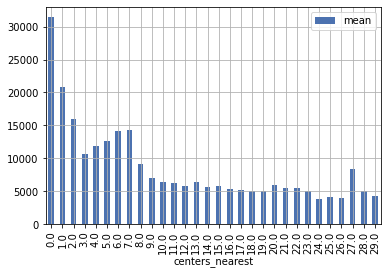

In [73]:
df= (
    data.loc[:, ['locality_name', 'centers_nearest', 'last_price']]
    .query('locality_name == "Санкт-Петербург"').
    sort_values(by = 'centers_nearest')
)

df0 = df.pivot_table(index = 'centers_nearest', values = 'last_price', aggfunc = ['mean'])
df0.columns = ['mean']
#print(df0.head())
df0.plot(kind = 'bar', grid = True)


Вывод: стоимость квартиры в зависимости от  расположения от центра убывает с ростом расстояния, но наблюдаются периодические пики, которые связаны с методами предобработки данных.Cудя по распределению центр Санкт-Перегбурга находится в радиусе 7 км. Из распределения видно, что спад прожад начинается с 7 км (до 3 км идет резкий спад, от 3 до 7 начинается подъем - данный скачок может быть вызван из-за большого количества пропусков и необходимостью их дополнить/обработать.

### Напишите общий вывод

Общий вывод:
1. Методы, используемые в предобработке данных, были направлены на минимизацию удаления данных. Один из методов заключался в заполнении данных по определенным группам значений с использованием медианы либо неких минимальных значений параметров, взятых из открытого доступа.
2. При анализе данных было установлено, что:
  Вывод:
   - Стоимость жилья зависит от метража, наблюдается линейная зависимость. Наиболее распространейнный диапазон цен до порядка 40 000 000 руб, также с увеличением метража на диаграммах наблюдаются асимптоты, то есть наблюдаются пороки с которых начинается старт продаж в зависимости от метража.
   - Стоимость от количества комнат в квартире зависит, но в среднем берут двухкомнатные, с увеличением комнат растет цена, что заставляет падать интерес к рассмотрению иных квартир из-за увеличения цены. Этаж в выборе квартир в основном рассматривается до    - На стоимость квартиры оказывыет тип этажа. Первый этаж, по сравнию с остальными, имеет амую низкую стоимость. Самую высокую стоимость имеют этажы между первым и последним.
   - Месяц и день не оказывают сильное влияние на стоимость квартир. Но больше всего квартиры стоят в апреле, ниже всего в июне. Самая высокая стоимость в среду, низкая в пятницу. 
   - Год влияет на стоимость квартир. с 2014 по 2016 наблюдался спад цен, после 2017 идет увеличение цены.
   - Стоимость квартиры в зависимости от  расположения от центра убывает с ростом расстояния, но наблюдаются периодические пики, которые связаны с методами предобработки данных. Cудя по распределению центр Санкт-Перегбурга находится в радиусе 7 км. Из распределения видно, что спад прожад начинается с 7 км (до 3 км идет резкий спад, от 3 до 7 начинается подъем - данный скачок может быть вызван из-за большого количества пропусков и необходимостью их дополнить/обработать.
